<a href="https://colab.research.google.com/github/HariSkr11/indian-sign-language-detection/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING DRIVE

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTING NECESSARY FUNCTIONS AND MODULES

In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
from pickle import load,dump
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import sklearn

# IMPORTING DATA

## IMPORTING TRAIN DATA

In [3]:
with open("/content/drive/MyDrive/resources_sign/X_train.pkl","rb") as file_object:
  X_train = load(file_object)

## IMPORTING TRAINING LABELS

In [4]:
with open("/content/drive/MyDrive/resources_sign/y_train.pkl","rb") as file_object:
  y_train = load(file_object)

## IMPORTING TESTING DATA

In [5]:
with open("/content/drive/MyDrive/resources_sign/X_test.pkl","rb") as file_object:
  X_test = load(file_object)

## IMPORTING TESTING LABELS

In [6]:
with open("/content/drive/MyDrive/resources_sign/y_test.pkl","rb") as file_object:
  y_test = load(file_object)

## IMPORTING THE LABEL ENCODER

In [7]:
with open("/content/drive/MyDrive/resources_sign/Label_encoder.pkl","rb") as file_object:
  label_encoder = load(file_object)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# VISUALIZING AND PREPROCESSING THE DATA

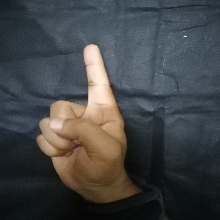

In [8]:
cv2_imshow(X_train[68]*255)

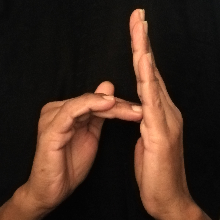

In [9]:
cv2_imshow(X_test[68]*255)

## ANALYZING ALL THE LABELS AND THE IMAGES

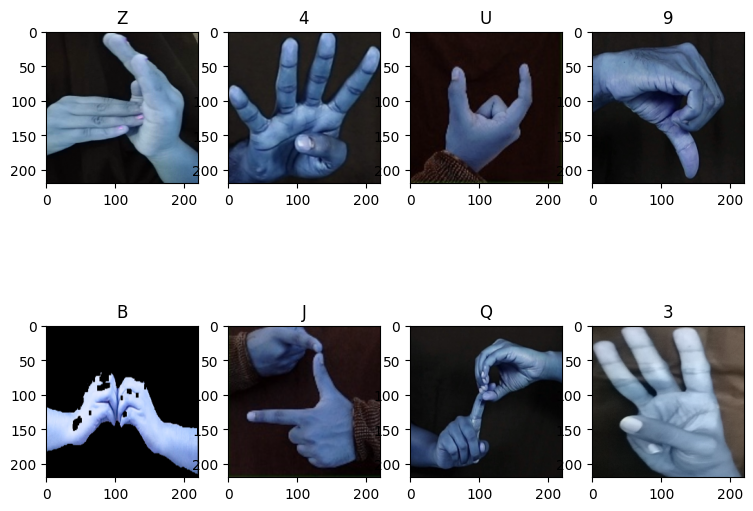

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(9,7))
row = 0
col = 0
for i in range(9):
  if col == 4:
    col=0
    row+=1
    axes[row][col].imshow(X_train[i])
    axes[row][col].set_title(label_encoder.inverse_transform([y_train[i]])[0])
  else:
    axes[row][col].imshow(X_train[i])
    axes[row][col].set_title(label_encoder.inverse_transform([y_train[i]])[0])
    col+=1

# APPLYING CANNY EDGE DETECTOR

## CHECKING OUT CANNY FILTER

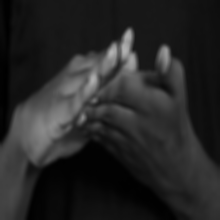

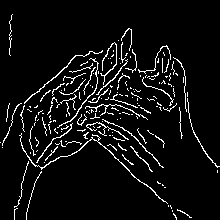

In [11]:
img = X_train[56]*255
grey = cv.cvtColor(img.astype(np.uint8),cv.COLOR_BGR2GRAY)
blur = cv.blur(grey,ksize=(5,5))
med_val = np.median(blur)
lower = int(max(0 ,0.7*med_val))
upper = int(min(255,1.3*med_val))
cv2_imshow(blur)
edges = cv.Canny(image=blur, threshold1=lower,threshold2=upper)
cv2_imshow(edges)

## MAKING CANNY FUNCTION FOR EVERY IMAGES

In [12]:
def apply_canny_filter(img):
  img = img*255
  img = cv.cvtColor(img.astype(np.uint8),cv.COLOR_BGR2GRAY)
  blur = cv.blur(img,ksize=(5,5))
  med_val = np.median(blur)
  lower = int(max(0 ,0.7*med_val))
  upper = int(min(255,1.3*med_val))
  return cv.Canny(image=blur, threshold1=lower,threshold2=upper)

## APPLYING THE FILTER TO EVERY IMAGES

In [13]:
X_train_filtered = []
for image in X_train:
  X_train_filtered.append(apply_canny_filter(image))

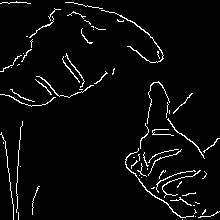

In [14]:
cv2_imshow(X_train_filtered[1980])

## PREPROCESSING TEST SET

In [15]:
X_test_filtered = []
for image in X_test:
  X_test_filtered.append(apply_canny_filter(image))

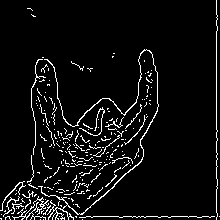

In [16]:
cv2_imshow(X_test_filtered[250])

## STORING THE FILTERED DATA BACK AS PKL FILES

In [17]:
with open("/content/drive/MyDrive/resources_sign/X_train_filtered.pkl","wb") as file_object:
  dump(X_train_filtered,file_object)

In [18]:
with open("/content/drive/MyDrive/resources_sign/X_test_filtered.pkl","wb") as file_object:
  dump(X_test_filtered,file_object)

# OPENING THE FILTERED DATA FOR TRAINING

In [37]:
from pickle import load,dump
with open("/content/drive/MyDrive/resources_sign/X_train_filtered.pkl","rb") as file_object:
  X_train_filtered=load(file_object)
with open("/content/drive/MyDrive/resources_sign/X_test_filtered.pkl","rb") as file_object:
  X_test_filtered=load(file_object)
with open("/content/drive/MyDrive/resources_sign/y_train.pkl","rb") as file_object:
  y_train=load(file_object)
with open("/content/drive/MyDrive/resources_sign/y_test.pkl","rb") as file_object:
  y_test=load(file_object)

# MAKING THE MODEL

## MODELS

## MODEL 1

In [ ]:
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.models import Sequential
class Sign_model:
  def __init__(self,input_shape,classes = 32):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), input_shape=(220, 220,1),strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(64, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Conv2D(32, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 1000 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 512 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 32 , activation = 'softmax'))
    model.compile(optimizer="adam",metrics = ['accuracy'],loss = "sparse_categorical_crossentropy")
    self.model = model

In [ ]:
model_object = Sign_model((220,220))
model = model_object.model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 128)     1280      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      73792     
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)      

In [49]:
len(X_train)//4

NameError: ignored

In [50]:
len(label_encoder.classes_)

32

In [ ]:
model.fit(np.array(X_train_filtered),y_train,epochs = 3)

Epoch 1/3
88/88 [==============================] - 25s 285ms/step - loss: 1.2410 - accuracy: 0.6806
Epoch 2/3
88/88 [==============================] - 25s 284ms/step - loss: 0.4242 - accuracy: 0.8785
Epoch 3/3
88/88 [==============================] - 25s 284ms/step - loss: 0.1855 - accuracy: 0.9491


In [ ]:
model.evaluate(np.array(X_test_filtered),y_test)

22/22 [==============================] - 2s 67ms/step - loss: 0.9896 - accuracy: 0.7507


[0.9896190166473389, 0.7507163286209106]

## MODEL 2

In [23]:
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.models import Sequential
class Sign_model_2:
  def __init__(self,input_shape,classes = 32):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), input_shape=(220, 220,1),strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((5,5) , strides = 2 , padding = 'same'))
    model.add(Conv2D(128, (3, 3), input_shape=(220, 220,1),strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((5,5) , strides = 2 , padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 1024 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 512 , activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units = 32 , activation = 'softmax'))
    model.compile(optimizer="adam",metrics = ['accuracy'],loss = "sparse_categorical_crossentropy")
    self.model = model

In [24]:
model_object = Sign_model_2((220,220))
model_2 = model_object.model

In [26]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 128)     1280      
                                                                 
 batch_normalization_2 (Batc  (None, 220, 220, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 110, 110, 128)     147584    
                                                                 
 batch_normalization_3 (Batc  (None, 110, 110, 128)    512       
 hNormalization)                                                 
                                                      

In [48]:
del X_train

NameError: ignored

In [31]:
del X_test

In [34]:
model_2.fit(np.array(X_train_filtered),y_train,epochs = 20)

Epoch 1/20
88/88 [==============================] - 21s 235ms/step - loss: 2.1942 - accuracy: 0.4358
Epoch 2/20
88/88 [==============================] - 21s 237ms/step - loss: 1.9784 - accuracy: 0.4556
Epoch 3/20
88/88 [==============================] - 21s 235ms/step - loss: 1.9887 - accuracy: 0.4767
Epoch 4/20
88/88 [==============================] - 21s 234ms/step - loss: 2.1199 - accuracy: 0.4577
Epoch 5/20
88/88 [==============================] - 21s 234ms/step - loss: 2.0066 - accuracy: 0.4699
Epoch 6/20
88/88 [==============================] - 21s 235ms/step - loss: 2.2301 - accuracy: 0.4502
Epoch 7/20
88/88 [==============================] - 21s 234ms/step - loss: 2.5264 - accuracy: 0.4165
Epoch 8/20
88/88 [==============================] - 21s 234ms/step - loss: 2.6354 - accuracy: 0.3824
Epoch 9/20
88/88 [==============================] - 21s 234ms/step - loss: 2.4401 - accuracy: 0.4057
Epoch 10/20
88/88 [==============================] - 21s 234ms/step - loss: 2.5013 - accura

In [35]:
model_2.evaluate(np.array(X_test_filtered),y_test)

22/22 [==============================] - 1s 52ms/step - loss: 1.9963 - accuracy: 0.4269


[1.9963184595108032, 0.4269340932369232]

In [36]:
model_2.predict(np.array(X_test_filtered))

22/22 [==============================] - 1s 50ms/step


array([[0.03106228, 0.05414378, 0.07158975, ..., 0.04162895, 0.03979595,
        0.01678435],
       [0.03106228, 0.05414378, 0.07158975, ..., 0.04162895, 0.03979595,
        0.01678435],
       [0.03106228, 0.05414378, 0.07158975, ..., 0.04162895, 0.03979595,
        0.01678435],
       ...,
       [0.03106228, 0.05414378, 0.07158975, ..., 0.04162895, 0.03979595,
        0.01678435],
       [0.03106228, 0.05414378, 0.07158975, ..., 0.04162895, 0.03979595,
        0.01678435],
       [0.03106228, 0.05414378, 0.07158975, ..., 0.04162895, 0.03979595,
        0.01678435]], dtype=float32)

In [43]:
predictions = [np.argmax(i) for i in model_2.predict(np.array(X_test_filtered))]

22/22 [==============================] - 1s 27ms/step


In [45]:
predictions

[26,
 24,
 1,
 12,
 1,
 24,
 30,
 15,
 1,
 19,
 2,
 28,
 10,
 1,
 24,
 9,
 23,
 25,
 8,
 4,
 28,
 4,
 5,
 11,
 3,
 7,
 12,
 1,
 9,
 0,
 5,
 10,
 15,
 13,
 2,
 17,
 31,
 4,
 13,
 21,
 8,
 13,
 4,
 8,
 24,
 27,
 17,
 17,
 19,
 4,
 11,
 18,
 1,
 18,
 27,
 5,
 22,
 1,
 31,
 28,
 22,
 28,
 5,
 14,
 10,
 4,
 18,
 23,
 31,
 1,
 20,
 2,
 3,
 21,
 19,
 3,
 21,
 7,
 29,
 2,
 1,
 18,
 27,
 15,
 2,
 22,
 2,
 13,
 10,
 2,
 12,
 5,
 29,
 9,
 22,
 20,
 28,
 1,
 8,
 20,
 18,
 2,
 17,
 18,
 13,
 6,
 0,
 20,
 30,
 4,
 27,
 14,
 5,
 15,
 9,
 23,
 12,
 4,
 14,
 7,
 9,
 28,
 13,
 12,
 1,
 4,
 4,
 24,
 16,
 17,
 12,
 19,
 1,
 1,
 13,
 24,
 27,
 6,
 4,
 10,
 6,
 11,
 19,
 4,
 11,
 3,
 23,
 14,
 31,
 31,
 7,
 12,
 17,
 26,
 14,
 11,
 9,
 4,
 13,
 4,
 31,
 30,
 1,
 27,
 27,
 26,
 11,
 1,
 23,
 11,
 13,
 16,
 5,
 28,
 31,
 27,
 13,
 4,
 0,
 7,
 17,
 25,
 7,
 10,
 31,
 1,
 13,
 12,
 10,
 10,
 20,
 10,
 6,
 8,
 20,
 8,
 18,
 8,
 8,
 27,
 9,
 10,
 13,
 1,
 10,
 4,
 17,
 20,
 3,
 18,
 14,
 9,
 20,
 8,
 0,
 30,
 21,